## Os impactos do suicídio na pandemia

**Grupo**:
- Ana Beatriz Oliveira de Macedo
- Andson Andre da Silva Ribeiro 
- Bruna Bellini Faria
- Lucca Cerf Costa
- Thiago Rodrigues de Jesus Carvalho

**Matéria**:

Projeto integrado:  Storytelling

### Instalações

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install plotly
!pip3 install numpy
!pip3 install folium
!pip3 install wordcloud
!pip3 install bs4
!pip3 install openpyxl
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 
#!pip3 install 

You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\bru30\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import folium
import plotly.express as px
import datetime
import re

#### Análise de palavras postadas no Twitter

Nesta análise se encontram três WordClouds, ou seja, três nuvens de palavras que englobam palavras encontradas em diversos tweets publicados por usuários e coletados em um site chamado "Workbench", este site coleta até 3000 postagens do conteúdo buscado. 

O primeiro WordCloud foi resultado de uma pesquisa das frases “não aguento mais” e “não posso mais viver” por todo o Twitter em português, já o segundo foi resultado da busca pela palavra  “suicídio” nas postagens e o terceiro foi por meio da busca das palavras “suicida” e “suicidar”. Com isso, notamos por meio da visualização das imagens que todos possuem palavras fortes que são compartilhadas diariamente nesta rede social, o essêncial para nós foi observar o quanto é importante para diversas pessoas conversar ou expor sua situação de uma maneira anônima ou não, as palavras mostram uma mistura de últimas despedidas, pedidos de ajuda, relatos de experiências, ofertas de apoio. Ademais, tudo isto mostra a essência por trás do Twitter, seja para o bem ou para o mal, dentro da análise existe um pequeno padrão de ajuda e suporte nos posts fornecido pelos usuários, mas também um padrão de experiências, motivos e desentendimentos, que mostram que pessoas precisam de um espaço para se expressar para relatar, conversar, se expressar e muito mais.

Importando os dados

In [3]:
# WordCloud 1

twitter_NAM =pd.read_csv(r'./Data/twitter_1.csv', sep=',')

#Limpando os dados, retirando colunas desnecessárias
twitter_NAM= twitter_NAM.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_NAM.columns.values[0]= 'Usuário'
twitter_NAM.columns.values[1]= 'Data de postagem'
twitter_NAM.columns.values[2]= 'Texto'

#twitter_NAM.info()
twitter_NAM.head(8)

,Usuário,Data de postagem,Texto
0,cherrywrxs,2021-05-10T19:07:55Z,RT @aslion: tou tão desinteressada últimamente...
1,pipoca_sep,2021-05-10T18:43:03Z,"Cortei a franja da Anna, ela se mexeu, ficou t..."
2,MathKavalcante,2021-05-10T18:20:18Z,RT @aslion: tou tão desinteressada últimamente...
3,Madame_Cosett,2021-05-10T18:11:56Z,RT @aslion: tou tão desinteressada últimamente...
4,Visatotn,2021-05-10T18:04:15Z,eu. não. consigo. mais. viver. nesse. país. te...
5,H3LBERTGE0RGE,2021-05-10T17:29:04Z,que ódiokk\n\n@DynaRiotS2 @Mushro0mBoy bora en...
6,Lailapadua4,2021-05-10T17:20:31Z,@alarissamatos Já não consigo nem viver direit...
7,mary_sozzo,2021-05-10T17:12:28Z,Minha mente é um turbilhão mais eu consigo viv...


In [5]:
# WordCloud 2

twitter_SC =pd.read_csv(r'./Data/twitter_3.csv', sep=',')

twitter_SC= twitter_SC.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SC.columns.values[0]= 'Usuário'
twitter_SC.columns.values[1]= 'Data de postagem'
twitter_SC.columns.values[2]= 'Texto'

#twitter_SC.info()
twitter_SC.head(8)

,Usuário,Data de postagem,Texto
0,yleunameem,2021-05-10T22:33:13Z,coragem pra cometer suicídio só queria isso
1,__bieela,2021-05-10T22:33:08Z,Já te falei vida do crime é suicidio lento
2,marieamts,2021-05-10T22:33:03Z,RT @nacarulyna: nao ironicamente suicídio es...
3,jungkookincel,2021-05-10T22:32:52Z,RT @gatinhopodre: opiniao que provavelmente va...
4,sarafonseca1893,2021-05-10T22:32:43Z,RT @ruuelmaa: Nem consigo imaginar o tamanho d...
5,peachjjinie,2021-05-10T22:32:38Z,RT @mafleurjk: ⚠️ prevenção de suicídio ⚠️\r\n...
6,ifsfairy,2021-05-10T22:32:25Z,tw // suicídio\r\n.\r\n.\r\n.\r\n.\r\n.\r\n.\r...
7,padeiiroo2,2021-05-10T22:32:25Z,@_haime_souza unica coisa impedindo meu suicid...


In [4]:
# WordCloud 3

twitter_SD =pd.read_csv(r'./Data/twitter_2.csv', sep=',')

twitter_SD= twitter_SD.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SD.columns.values[0]= 'Usuário'
twitter_SD.columns.values[1]= 'Data de postagem'
twitter_SD.columns.values[2]= 'Texto'

#twitter_SD.info()
twitter_SD.head(8)

,Usuário,Data de postagem,Texto
0,bibi98209150,2021-05-11T21:37:40Z,@svenusblack @odiar_homem @beyangeI ta rindo p...
1,_Capela5,2021-05-11T21:21:59Z,Já tinha aqui umas mensagens para ajudar pesso...
2,Oxe_imp,2021-05-11T21:14:45Z,@guarana @elleir_cs @oocbrazil Eu vou suicidar...
3,marquesa22_,2021-05-11T21:12:47Z,"@brunamsss Amiga, o filme viajou demais na mai..."
4,louispiola2,2021-05-11T21:11:29Z,@Killmyalma me queiro matar balear morir suicidar
5,DjGeanSilvaa,2021-05-11T20:57:17Z,"RT @biianbjb: gente, eu quero de fato me suici..."
6,littlejezz,2021-05-11T20:46:34Z,"Tirando a última parte da conversa, isso me le..."
7,patriciaob13,2021-05-11T20:44:20Z,Eu repito pra mim mesma q n tem nd q eu n ague...


Gerando os WordClouds

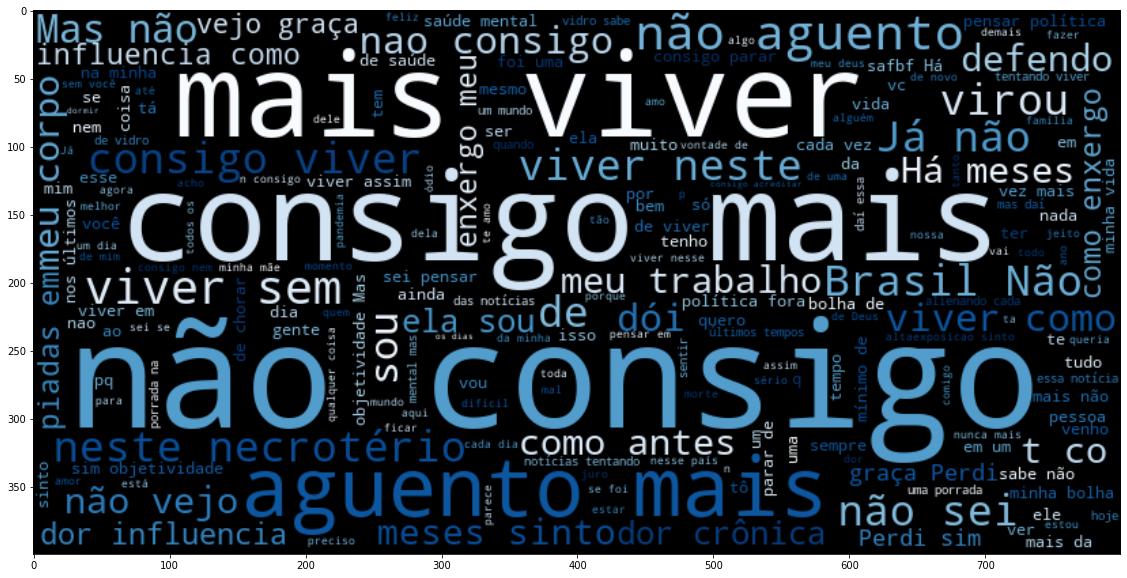

In [6]:
# WordCloud 1

# Texto com todas as palavras que a coluna 'Texto'
text = " ".join(review for review in twitter_NAM.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

# Criando stopwords paera remover as palavras indesejadas
stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "e", "pra", "o", "que", "t: co", "e ela", "paulo gustavo", "https", "Bolsonaro", "é", "veiadoscausos", "t  co", "Eu", "gustavo", "paulo  gustavo", "paulo"])

# Gerando a imagem da word cloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

# Exibição da imagem gerada pelo matplotlib 
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

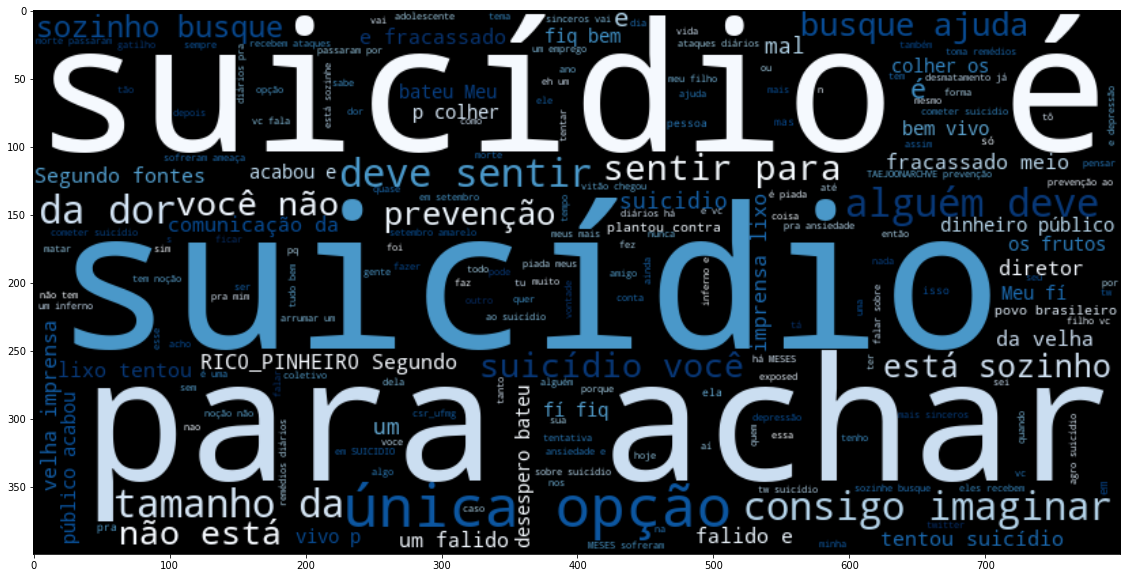

In [8]:
# WordCloud 2

text = " ".join(review for review in twitter_SC.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "ruuelmaa", "Nem", "NuXfIsTwjc", "byangells", "fuder", "whindersson", "mamata", "luisa", "RICO_PINHEIRO", "EstadaoFake", "que"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

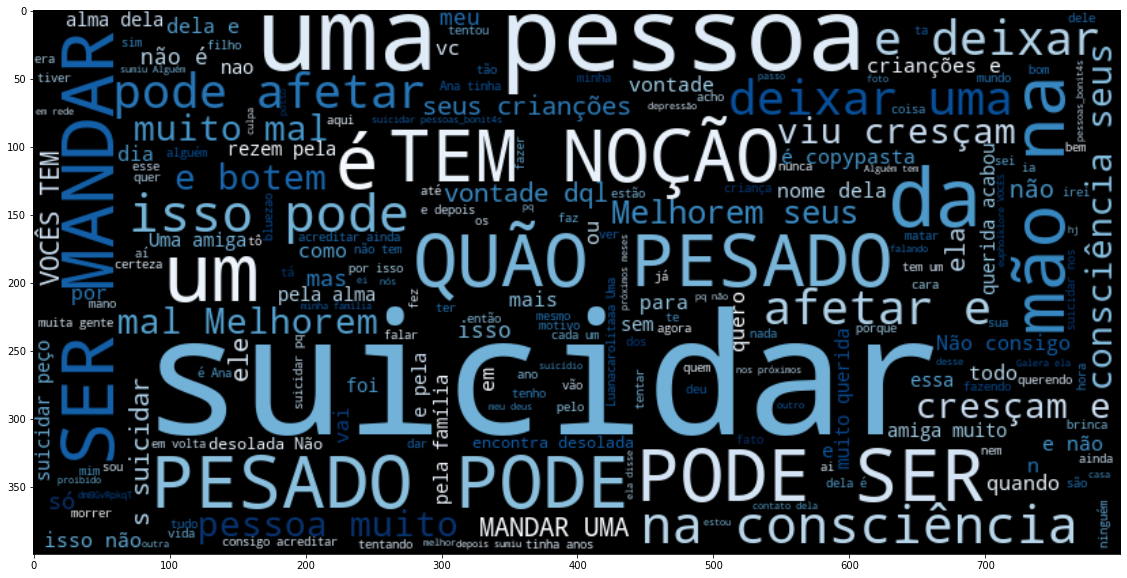

In [7]:
# WordCloud 3

text = " ".join(review for review in twitter_SD.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "porra", "imbecis", "Ldivino_ribeiro", " porra ", "que", "pra"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Análise dos relatórios mensais do CVV (Centro de Valorização a Vida)

Lendo os dados dos relatórios mensais do CVV, observamos que haviam aspectos essenciais para analisar e gerar um conhecimento maior para nossa pesquisa, os número de ligações atendidas e perdidas, os número de ligação por cada região do Brasil, o tempo médio das ligação atendidas e a maneira de realização do atendimento, sendo remoto ou físico, todos essenciais para certo entendimento. 

O gráfico 1 mostra o volume de ligações atendidas no Brasil há cada mês, e foi um choque para nós vermos que mais de 210 mil pessoas procuram por atendimento e tem sucesso, isso pode parecer pouco observando toda a população brasileira, porám devemos considerar que são mais de 210 mil pessoas pedindo ajuda para estranhos porque não conseguem ou não tem uma pessoa proxíma para pedir ajuda, todas essas pedem assistência por ligação, então imagine quantas não pedem por email, pelo chat, ou mesmo quantas não tem suas ligações atendidas como mostra o 2 gráfico, pois bem agora os números já parecem maiores não?, mas ainda não acabou pois diversos indivíduos não chegam a pedir ajuda seja por um bloquio pessoal, por falta de acesso, ou até mesmo pelo medo de srem julgados de alguma forma. O tabu que a sociedade impõe no tema do suicídio vem corrompendo indivíduos com o medo de serem julgados, mas se ao menos a população soubesse que basta de 7 a 9 minutos para dar assistência a alguém que necessita, segundo o gráfico 3, e todos falassem mais abertamente sobre o assunto, talvez este tabu diminuisse ou fosse tão pequeno que passaria despercebido. 

A curiosidade sobre as mudanças desses atendimentos na pandêmia nos foi despertada e decidimos por análisar a taxa de atendimentos fisícos e remotos no periodo de entrada da pandemia e durante, foi interresante notar no gráfico 4 que antes a ida ao local era o meio mais utilizado pelos usuários, mas com a entrada da pandemia o método remoto foi tomando conta e com isso a demanda maior de profissionais tecnologicamente capacitados, afinal o CVV não só atende por telefone, mas segundo seu site oficial, podem ser trocadas mensagens, emails e ligações por vídeo. O pico de ligações perdidas em Novembro de 2020, no gráfico 3, foi época de iniciação dos treinamentos para interresados em ajudar o centro, depois elas voltam a ser mais baixas, mas ainda assim com números altos, é nessa parte que entramos com a ideia de fornecer uma colaboração, uma ajuda diferente para quem está precisando e não está conseguindo neste momento tão tenso e frustante para todos. Aqueles que sentem a necessidade de ir ao local fisicamente demonstram para nossa analise que sabem seu nível de preocupação e que tenativas remotas não são suficientes, mas para aqueles que o remoto está sendo suficiente, imagine se esses pudessem ao ínves ou além de usar o CVV, utilizar da cooperação e suporte de seus entes proxímos de uma maneira simples, mas eficaz.
    

Importando os dados

In [9]:
# Gráficos

colunas = ["mes", "ano", "vla", "vlp", "ar", "af", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba"]
dados= pd.read_csv('./Data/CVV_analise.csv', sep=";", header=0, names=colunas)
dados.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525


In [10]:
# Gráficos 

def converter_tempo_numero(x):
    return int(x[3:5]) + int(x[6:8])/60
    
dados['mt'] = dados.mtp.apply(converter_tempo_numero)

In [11]:
# Gráficos

dados["mes_ano"] = dados["ano"].apply(int)
dados["mes_ano"] = dados["mes_ano"].apply(str)
dados["mes_ano"] = dados["mes"] + " " + dados["mes_ano"]
dados.head(8)

,mes,ano,vla,vlp,ar,af,mtp,nsp,nrj,nmg,nrs,npe,npr,nba,mt,mes_ano
0,Janeiro,2020,311716,67236,27819,283897,00:06:44,88545,38875,36803,40858,20153,11846,12633,6.733333,Janeiro 2020
1,Fevereiro,2020,283387,63253,22627,260760,00:06:48,75267,34067,33565,33160,21350,11529,14570,6.800000,Fevereiro 2020
2,Março,2020,255298,77626,41438,213860,00:07:11,77484,32909,29863,29029,18684,12797,14996,7.183333,Março 2020
3,Abril,2020,242528,66381,151672,90856,00:07:14,74228,30847,30187,25305,25305,11727,14614,7.233333,Abril 2020
4,Maio,2020,232930,59300,156779,76151,00:07:44,67817,29831,28306,25871,16572,11892,13103,7.733333,Maio 2020
5,Junho,2020,219604,59630,148352,71252,00:07:46,68229,26277,24833,24595,15312,12472,12466,7.766667,Junho 2020
6,Julho,2020,233925,64349,157988,75937,00:07:43,77131,29349,26735,26212,13286,13755,12897,7.716667,Julho 2020
7,Agosto,2020,258919,59965,173893,85026,00:07:10,81909,28007,28676,31043,15708,15809,17525,7.166667,Agosto 2020


In [12]:
# Gráfico 4

atendimento = dados.drop(["mes", "ano", "vla", "vlp", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba", "mt"], axis = 1)
atendimento.dropna(inplace=True)
atendimento.head(8)

,ar,af,mes_ano
0,27819,283897,Janeiro 2020
1,22627,260760,Fevereiro 2020
2,41438,213860,Março 2020
3,151672,90856,Abril 2020
4,156779,76151,Maio 2020
5,148352,71252,Junho 2020
6,157988,75937,Julho 2020
7,173893,85026,Agosto 2020


In [13]:
# Gráfico 5

cidades = dados.drop(['mes','ano','vla','vlp','ar','af','mtp', 'mt'], axis = 1)
cidades.head(8)

,nsp,nrj,nmg,nrs,npe,npr,nba,mes_ano
0,88545,38875,36803,40858,20153,11846,12633,Janeiro 2020
1,75267,34067,33565,33160,21350,11529,14570,Fevereiro 2020
2,77484,32909,29863,29029,18684,12797,14996,Março 2020
3,74228,30847,30187,25305,25305,11727,14614,Abril 2020
4,67817,29831,28306,25871,16572,11892,13103,Maio 2020
5,68229,26277,24833,24595,15312,12472,12466,Junho 2020
6,77131,29349,26735,26212,13286,13755,12897,Julho 2020
7,81909,28007,28676,31043,15708,15809,17525,Agosto 2020


Gerando os gráficos

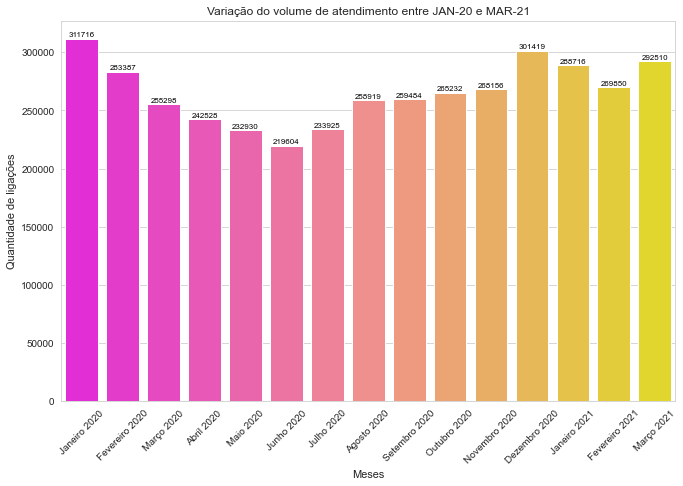

In [14]:
# Gráfico 1

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vla", errwidth=0, palette= 'spring')
ax.set_title('Variação do volume de atendimento entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

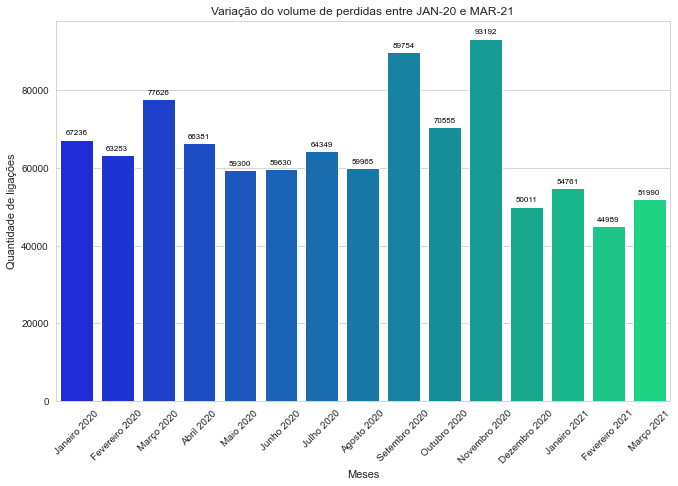

In [15]:
# Gráfico 2

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vlp", errwidth=0, palette='winter')
ax.set_title('Variação do volume de perdidas entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade de ligações', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

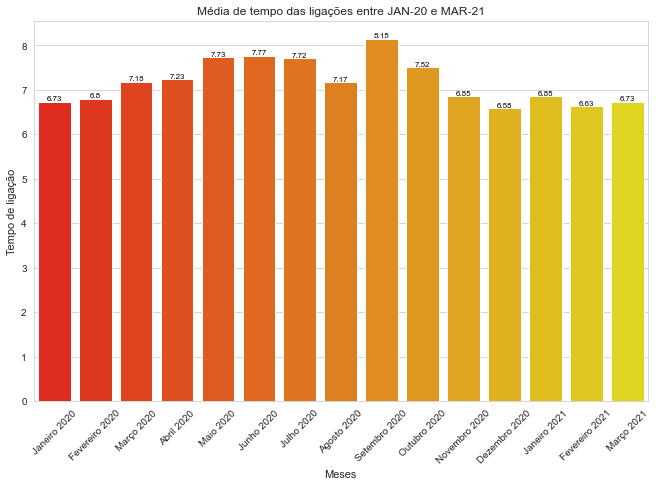

In [16]:
# Gráfico 3

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "mt", errwidth=0, palette= 'autumn')
ax.set_title('Média de tempo das ligações entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Tempo de ligação', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(round(i.get_height(),2), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

In [17]:
# Gráfico 4

graf1 = go.Bar(x=atendimento['mes_ano'], y=atendimento["af"], name = 'Físico', marker = {'color': '#00ced1'})
graf2 = go.Bar(x=atendimento['mes_ano'], y=atendimento["ar"], name = 'Remoto', marker = {'color': '#fa8072'})
data = [graf1, graf2]
layout = go.Layout(title='Classificação dos atendimentos entre JAN-20 e MAR-21',
                   yaxis={'title':'Quantidade de atendimentos'},
                   xaxis={'title': 'Meses'},
                   barmode="stack", height=600, width=1000)
fig = go.Figure(data= data, layout=layout)                
py.iplot(fig)

In [18]:
# Gráfico 5 

SP= go.Scatter(x=dados['mes_ano'], y=dados['nsp'],
                    mode='lines+markers',
                    name='SP', line = dict(color='deeppink', width=2))
RJ= go.Scatter(x=dados['mes_ano'], y=dados['nrj'],
                    mode='lines+markers',
                    name='RJ', line = dict(color='darkorange', width=2))
MG= go.Scatter(x=dados['mes_ano'], y=dados['nmg'],
                    mode='lines+markers',
                    name='MG', line = dict(color='purple', width=2))                    
RS= go.Scatter(x=dados['mes_ano'], y=dados['nrs'],
                    mode='lines+markers',
                    name='RS', line = dict(color='deepskyblue', width=2))
PE= go.Scatter(x=dados['mes_ano'], y=dados['npe'],
                    mode='lines+markers',
                    name='PE', line = dict(color='limegreen', width=2))
PR= go.Scatter(x=dados['mes_ano'], y=dados['npr'],
                    mode='lines+markers',
                    name='PR', line = dict(color='yellow', width=2))
BA= go.Scatter(x=dados['mes_ano'], y=dados['nba'],
                    mode='lines+markers',
                    name='BA', line = dict(color='gray', width=2))
data= [SP, RJ, MG, RS, PE, PR, BA]
layout= go.Layout(title={
                    'text' : 'Número de ligações por região entre JAN-20 e MAR-21',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Meses', 'tickangle' : 45},
                   legend_title="Regiões:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

#### Análise do Google trends na busca por suicídio

DESCREVER A IMPORTANCIA E A ANÁLISE

Importando os dados

In [19]:
# Gráfico 1

colunas = ['semana_2020', 'porcentagem_2020', 'semana_2019', 'porcentagem_2019']
suicide_searches = pd.read_csv(r'./Data/multiTimeline.csv', sep=',', header=0, names=colunas)

#suicide_searches.info()
suicide_searches.head(8)

,semana_2020,porcentagem_2020,semana_2019,porcentagem_2019
0,2020-01-05,53,2019-01-06,52
1,2020-01-12,50,2019-01-13,50
2,2020-01-19,53,2019-01-20,50
3,2020-01-26,51,2019-01-27,49
4,2020-02-02,49,2019-02-03,67
5,2020-02-09,51,2019-02-10,53
6,2020-02-16,63,2019-02-17,56
7,2020-02-23,51,2019-02-24,61


In [20]:
# Gráfico 2

colunas = ['Semana','Japão', 'Brasil', 'Estados Unidos']
bra_eua_jap_searches= pd.read_csv(r'./Data/multiTimeline cópia.csv', sep= ',', header=0, names=colunas)
#bra_eua_jap_searches = bra_eua_jap_searches.drop([0,1], axis=0)

#bra_eua_jap_searches.info()
bra_eua_jap_searches.head(8)

,Semana,Japão,Brasil,Estados Unidos
0,2020-01-05,26,11,13
1,2020-01-12,16,10,15
2,2020-01-19,13,14,16
3,2020-01-26,16,12,15
4,2020-02-02,16,11,15
5,2020-02-09,14,10,15
6,2020-02-16,22,11,17
7,2020-02-23,14,10,15


In [21]:
# Gráfico 3

geo = pd.read_csv("./Data/geoMap.csv", header=0, names=['pais', '2020', '2019'])
geo.dropna(inplace=True)

# geo.info()
geo.head(8)

,pais,2020,2019
0,Japão,58,42
1,Paraguai,38,62
2,Irã,51,49
3,Colômbia,37,63
4,Coreia do Sul,50,50
5,Turquia,44,56
6,Estados Unidos,47,53
7,Brasil,41,59


Gerando os gráficos

In [22]:
# Gráfico 1

ano_20= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2020'],
                    mode='lines+markers',
                    name='2020', line = dict(color='crimson', width=2))
ano_19= go.Scatter(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], y=suicide_searches['porcentagem_2019'],
                    mode='lines+markers',
                    name='2019', line = dict(color='lightseagreen', width=2))
data= [ano_20, ano_19]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Janeiro até Dezembro de 2019 e 2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Anos:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [23]:
# Gráfico 2

J= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Japão'],
                    mode='lines+markers',
                    name='JAPÃO', line = dict(color='purple', width=2))
B= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Brasil'],
                    mode='lines+markers',
                    name='BRA', line = dict(color='limegreen', width=2))
E= go.Scatter(x=bra_eua_jap_searches['Semana'], y=bra_eua_jap_searches['Estados Unidos'],
                    mode='lines+markers',
                    name='EUA', line = dict(color='darkorange', width=2))
data= [J, B, E]
layout= go.Layout(title={
                    'text' : 'Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Semanas', 'tickangle' : 45},
                   legend_title="Países:",
                    height=600, width=1000)
fig = go.Figure(data= data, layout=layout)
fig.show()

In [24]:
# Gráfico 3

graf1 = go.Bar(x=geo["pais"], y=geo["2019"], name = '2019', marker = {'color': 'lightseagreen'})
graf2 = go.Bar(x=geo["pais"], y=geo["2020"], name = '2020', marker = {'color': 'crimson'})
data = [graf1, graf2]
layout = go.Layout(title='Comparação de pesquisas sobre suicídio entre 2019 e 2020',
                   yaxis={'title':'Porcentagem de pesquisa'},
                   xaxis={'title': 'Países'},
                   barmode="stack",
                   height=600, width=1000)
fig = go.Figure(data=data, layout=layout)                
py.iplot(fig)

In [173]:
# Gráfico 4 

paises=["BRA", "EUA", "JAP", "BEL"]

fig = go.Figure(data=[
    go.Bar(name='2019', x=paises, y=[13520, 47511, 20169, 2098], marker = {'color': 'lightseagreen'}),
    go.Bar(name='2020', x=paises, y=[12256, 44834, 20081, 2656], marker = {'color': 'crimson'})
], layout= layout)
layout = go.Layout(title='Números absolutos de suicídios em quatro Países',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Países'})

fig.update_layout(barmode='group')
fig.show()

### Análise do número de vitímas de suicídio em 2019 e 2020

A importância da análise dos casos de suicídio no Brasil visa um aprofundamento na pesquisa e nas correlações com os outros dados. Os gráficos 4 da análise do Google trends na busca por suicídio indica os números absolutos de suicídios no Brasil no ano de 2019 e 2020, ao compara-los notamos que apesar dos casos terem diminuido em 2020, no período da pandêmia do Coronavírus, essa diminuição foi significamente pequena, uma média 1360 pessoas, demonstrando que a quaretena apesar de ser um agaravdor para desenvolvimentos de problemas psicológicos, segundo a cnn Brasil, teve seu ponto bom ao prevenir o suicídio para pessoas que vivem acompanhadas de alguém na faixa etária de 10 a 39 , como pode ser comprovado no gráfico 3 e 4, qual demonstra uma diminução consideravel nestas faixas étarias.Porém, na faixa étaria de 70 a 80+ foi comprovado um cresciemnto daqueles indivíduos que acabaram por ficar sozinhos, isolados, grupos de risco se poder ver suas familia, colegas, amigos... aumentando sua taxa de suicídio. 

Outro fator interressante além das idades são as mortes por estados, podemos observar no gráfico 1 e 2 a quantia de mortes absolutas dividias por estados e notar que o tabu do suicídio acontecer mais em estados de baixa eficiência está errado, já que o estado de São paulo se encontra majoritariamente no Ranking de Eficiência dos Municípios da Folha em claassificações de cidades com "eficiência", diferentemente de Roraima que mesmo obtendo classificação de cidades com "pouca eficiência". Apesar destas serem informações que comprovam a imprecisão do tabu, algumas pessoas podem ainda dizer que a população de Roraima é muito menor do que a de São Paulo e por isso existem menos mortes, de fato isto é algo a considerar, porém quando fazemos os calculos das porcentagens de mortes por população, em SP obtemos um total de 0,52% em 2019 e 0,49% em 2020, enquanto em Roraima a porcentagem foi de 0,61% em 2019 e 0,55% em 2020, ou seja indica que as mortes de Roraima são maiores porém ainda muito similares a de São Paulo a ponto de não considerarmos a existencia do tabu.

Alem disso, a ligação entre os estados do Brasil e seus casos de suicídio, gráficos 1 e 2 com o gráfico 5 da análise dos relatórios mensais do CVV (Centro de Valorização a Vida) é muito interresante a notarmos que a região com mais caso é a que mais faz atendimentos, São Paulo é um estado com uma diversidade etnica, cultural e social imensa, mas que também possui uma alta tecnologia que grande parte da população utiliza, mais especificamente 79,3% da população, segundo o IBGE, possui um celular pelo menos, isso relaciona a alta taxa de atendiemtno no estado e também demonstra que não só São Paulo mas todas as regiões com taxas de mortes por suicídio acompanham uma taxa razoavelmente alta de ligações, sempre maior do que a quantidade de mortes mensais de acordo com a analise feita nas atabelas de relatórios mensais do CVV.



Importando os dados

In [26]:
# Gráfico 1

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([99, 100, 108, 118, 127, 123])
# display(df)
# df.head(8)

df_2019 = df.loc[ df['data'] == '2019' ]
df_2019.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
101,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,13.0,13.0,17.0,10.0,8.0,10.0,13.0,9.0,12.0,9.0,12.0,14.0,140.0
102,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,8.0,4.0,6.0,6.0,6.0,3.0,5.0,7.0,7.0,3.0,8.0,9.0,72.0
103,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,18.0,17.0,16.0,21.0,23.0,21.0,26.0,24.0,19.0,20.0,23.0,25.0,253.0
104,2019,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,2.0,3.0,8.0,5.0,3.0,2.0,5.0,8.0,6.0,3.0,1.0,4.0,50.0


In [27]:
# Gráfico 2

df = pd.read_csv('./Data/localidadeXano.csv', sep= ';')
df.columns.values[1]= 'data'
df = df.drop(['ano (uid)','local (nome)', 'indicador (uid)', 'local (uid)', 'estatistica (uid)', 'estatistica (nome)', 'lococor (uid)', 'lococor (nome)', 'atestante (uid)', 'atestante (nome)', 'grupoetario (uid)', 'categoria (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (uid)', 'localidade (uid)', 'categoria (nome)'], axis=1)
df = df.drop([132, 133, 141, 151, 156, 160])
# display(df)
# df.head(8)

df_2020 = df.loc[ df['data'] == '2020*' ]
df_2020.head(4)

,data,indicador (nome),grupoetario (nome),racacor (nome),sexo (nome),abrangencia (nome),localidade (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
134,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Rondônia,14.0,12.0,11.0,9.0,9.0,13.0,10.0,10.0,13.0,18.0,8.0,10.0,137.0
135,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Acre,7.0,6.0,4.0,8.0,6.0,8.0,3.0,5.0,5.0,7.0,5.0,7.0,71.0
136,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Amazonas,35.0,23.0,25.0,25.0,30.0,22.0,28.0,18.0,28.0,21.0,26.0,33.0,314.0
137,2020*,(X60-X84) Lesões autoprovocadas intencionalmente,Todos,Todos,Todos,Unidade da federação,Roraima,9.0,0.0,2.0,3.0,5.0,3.0,5.0,2.0,3.0,0.0,1.0,2.0,35.0


In [29]:
# Gráfico 1 e 2

def calc_raio(n):
    if (n < 0):
        return 0
    return (int((np.log(n + 1.00001))) + 0.2) * 1000

In [187]:
# Gráfico 3 e 4

df = pd.read_csv('./Data/grupoetarioXano.csv', sep= ';')
df = df.drop(['local (uid)', 'ano (uid)', 'abrangencia (uid)', 'pais (uid)', 'indicador (uid)', 'lococor (nome)', 'estatistica (uid)', 'categoria (nome)', 'categoria (uid)', 'lococor (uid)', 'atestante (uid)', 'racacor (uid)', 'sexo (uid)', 'abrangencia (nome)', 'local (nome)', 'grupoetario (uid)', 'atestante (nome)'], axis=1)
df = df.drop([42, 43, 56, 57])
df.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
0,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,Infantil,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,01 a 04,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,0,0,0,0,0,1,0,0,3,0,0,0,4
3,2016,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,9,5,13,15,11,7,8,13,16,17,11,18,143


In [189]:
# Gráfico 3

dfl_2019 = df.loc[ df['ano (nome)'] == '2019' ]
dfl_2019.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
44,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,0,0,1,0,0,1,0,0,0,0,0,0,2
45,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,12,8,14,15,17,8,23,18,21,21,17,15,189
46,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,15 a 19,78,73,91,90,82,75,75,79,115,87,91,86,1022
47,2019,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,20 a 29,230,227,261,230,239,216,228,229,238,246,247,249,2840


In [110]:
# Gráfico 3

df_teste = dfl_2019.drop(55).loc[:,'Janeiro':'Dezembro'].T
df_teste.columns = dfl_2019['grupoetario (nome)'][:11]
df_teste

grupoetario (nome),05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 e +,Branco/Ignorado
Janeiro,0,12,78,230,218,206,178,107,58,24,1
Fevereiro,0,8,73,227,204,187,157,95,54,23,0
Março,1,14,91,261,247,225,191,107,64,17,4
Abril,0,15,90,230,238,204,162,101,60,20,3
Maio,0,17,82,239,238,189,161,120,65,33,1
Junho,1,8,75,216,226,190,140,122,55,21,0
Julho,0,23,75,228,220,177,188,93,57,25,0
Agosto,0,18,79,229,228,199,157,102,69,21,1
Setembro,0,21,115,238,213,218,170,109,60,30,0
Outubro,0,21,87,246,237,194,166,110,56,17,0


In [192]:
# Gráfico 4

dfl_2020 = df.loc[ df['ano (nome)'] == '2020*' ]
dfl_2020.head(4)

,ano (nome),pais (nome),indicador (nome),estatistica (nome),racacor (nome),sexo (nome),grupoetario (nome),Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
58,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,05 a 09,1,0,0,0,0,1,1,0,0,0,0,0,3
59,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,10 a 14,8,13,12,10,15,16,11,15,13,13,14,7,147
60,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,15 a 19,83,92,100,60,67,72,62,77,63,91,75,73,915
61,2020*,Brasil,(X60-X84) Lesões autoprovocadas intencionalmente,Número de óbitos,Todos,Todos,20 a 29,234,239,228,198,184,171,180,175,233,223,235,199,2499


In [123]:
# Gráfico 4

df_teste1 = dfl_2020.drop(69).loc[:,'Janeiro':'Dezembro'].T
df_teste1.columns = dfl_2020['grupoetario (nome)'][:11]
df_teste1

grupoetario (nome),05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 e +,Branco/Ignorado
Janeiro,1,8,83,234,244,222,177,124,68,28,3
Fevereiro,0,13,92,239,214,186,148,116,67,25,2
Março,0,12,100,228,197,184,154,111,61,30,0
Abril,0,10,60,198,185,178,153,105,57,24,0
Maio,0,15,67,184,200,182,165,90,47,25,1
Junho,1,16,72,171,204,168,128,88,75,26,2
Julho,1,11,62,180,186,170,147,109,62,20,0
Agosto,0,15,77,175,166,183,145,89,69,38,2
Setembro,0,13,63,233,182,195,159,97,58,17,5
Outubro,0,13,91,223,181,184,153,130,62,21,1


Gerando o gráfico

In [166]:
# Gráfico 1

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2019.iloc[0]['data']

df_sorted = df_2019.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2019 ",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1200, height= 700)
fig.show()

In [167]:
# Gráfico 2

nm_coluna_x = "localidade (nome)"
nm_coluna_y = "Ano"
qtde_municipios = 27
data_analise = df_2020.iloc[0]['data']

df_sorted = df_2020.sort_values('Ano', ascending=False)

fig = px.scatter(df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do Brasil em 2020 ",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1200, height= 700)
fig.show()

In [161]:
# Gráfico 3

#px.line(dfl_2019.drop(55).loc[:,'Janeiro':'Dezembro'].T)
fig= px.scatter(df_teste, title='Número de mortes de suicídio por faixa etária em 2019', color_discrete_sequence= px.colors.qualitative.Light24, 
        labels={
            "value":"Quantidade de mortos",
            "index":"Meses de 2019",
            "grupoetario (nome)":"Grupos etários:"
}).update_traces(mode='markers+lines')
fig

In [172]:
# Gráfico 4

#px.line(dfl_2020.drop(55).loc[:,'Janeiro':'Dezembro'].T)
fig= px.scatter(df_teste1, title='Número de mortes de suicídio por faixa etária em 2020', color_discrete_sequence= px.colors.qualitative.Light24, 
        labels={
            "value":"Quantidade de mortos",
            "index":"Meses de 2020",
            "grupoetario (nome)":"Grupos etários:"
}).update_traces(mode='markers+lines')
fig


### Análise de mortes por suicídio nos EUA em 2019

Importando os dados

In [37]:
# Gráfico 4

py.init_notebook_mode(connected=True)

df = pd.read_excel(r'./Data/Tabela 1.xlsx')
# Removendo as colunas desnecessários;
df = df.drop(columns=['Crude Rate','YPLL','Crude YPLL Rate','appliedFilters'])
# Removendo uma linha que não possui informações;
df = df.drop(8)
df
# Renomeando as colunas
df = df.rename(columns ={'Race': 'Raça', 'Sex':'Sexo','Number of Deaths': 'Número de mortes'})
df

,Raça,Sexo,Número de mortes
0,White,Males,"28,054"
1,White,Females,"8,152"
2,Black,Males,"2,511"
3,Black,Females,652
4,American Indian,Males,478
5,American Indian,Females,161
6,Asian/PI,Males,"1,064"
7,Asian/PI,Females,407


In [230]:
# Gráfico 5

suicidios_eua_19 = pd.read_csv(r'./Data/csv.csv')

suicidios_eua_19 = suicidios_eua_19.drop(columns=['URL', 'RATE'])

suicidios_eua_19.rename(columns={'YEAR': 'ano'}, inplace = True)
suicidios_eua_19.rename(columns={'STATE': 'estados'}, inplace = True)
suicidios_eua_19.rename(columns={'DEATHS': 'mortes'}, inplace = True)

suicidios_eua_19.head(8)

,ano,estados,mortes
0,2019,alabama,804
1,2019,alaska,210
2,2019,arizona,1419
3,2019,arkansas,548
4,2019,california,4436
5,2019,colorado,1312
6,2019,connecticut,435
7,2019,delaware,111


In [237]:
#calculo da mortes por estado com o número de a cada 1000000
def conta_mortos(x, y):
    return (x/100000)*y
    
def main():
    a = float( input("população: ") )
    b = float( input("porcentagem: ") )
    c = conta_mortos(a,b)
    print(c)

main()

107.543142


In [238]:
# Gráfico 6 

suicidios_eua_20 = pd.read_excel(r'./Data/eua_2020_estados.xlsx')
suicidios_eua_20.head(8)

,estados,mortes
0,West Virginia,387
1,Florida,3446
2,Illinois,1486
3,Minnesota,759
4,Maryland,661
5,Rhode Island,107
6,Idaho,438
7,New Hampshire,269


In [215]:
suicidios_eua_20['mortes'].sum()

48862

Gerando os gráficos 

In [39]:
# Gráfico 4

trace1 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'], # Denominação das raças segundo o IBGE
                y = [28054, 2511, 478, 1064],
                name = 'Homens',
                marker = {'color': 'blue'})

trace2 = go.Bar(x = ['Branca', 'Preta/parda', 'Nativa-americana','Asiática'],
                y = [8152, 652, 161, 407],
                name = 'Mulheres',
                marker = {'color': 'deeppink',})

layout = go.Layout(title='Taxa de Suicídio por Raça e Sexo',
                   yaxis={'title':'Número de Mortes'},
                   xaxis={'title':'Tipo de raça'})

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [185]:
# Gráfico 5

nm_coluna_x = 'Estado'
nm_coluna_y = 'Mortes'
qtde_municipios = 27 #deixar os 51 para o caderno final 

suicidios_eua_19_sorted = suicidios_eua_19.sort_values('Mortes', ascending=False)

fig = px.scatter(suicidios_eua_19_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do EUA em 2019 ",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1500, height= 900)
fig.show()

In [206]:
# Gráfico 6

nm_coluna_x = 'estados'
nm_coluna_y = 'porcentagem'
qtde_municipios = 27 #deixar os 51 para o caderno final 

suicidios_eua_20_sorted = suicidios_eua_20.sort_values('porcentagem', ascending=False)

fig = px.scatter(suicidios_eua_20_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60,
color_discrete_sequence= px.colors.qualitative.Light24)

fig.update_layout(
title = "Número de vítimas de suicídio em todos os estados do EUA em 2020",
xaxis_title = "Estados",
yaxis_title = "Quantidade de vítimas",
width = 1500, height= 900)
fig.show()

KeyError: 'porcentagem'

### Web Scrapping da tabela da Wikipédia

In [239]:
url_pagina = 'https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate'

In [240]:
pagina_html = requests.get(url_pagina)
pagina_html

<Response [200]>

In [241]:
soup = BeautifulSoup(pagina_html.content, 'html.parser')
# print(soup.prettify())

In [242]:
tb_suicidio = soup.find(class_='sortable mw-datatable static-row-numbers wikitable')

In [243]:
lines_tb = tb_suicidio.find_all('tr')

In [244]:
inicio_tb = 1
final_tb = 190

In [246]:
def prep_linha(line):
    line = line.strip("\n")
    line = line.strip(" ")
    line = line.replace(u"\xa0", u"")
    line = line.replace("\n","\t")
    line = re.sub(r"\[[\d|a-z]+\]", "",line)
    line = line.rstrip("\t")
    line = line.replace("\t\t", "\t")
    line = line.replace("–", "")
    
    return line

In [247]:
texto_fim = "País\tMortes a cada 100000 habitantes\tHomens\tMulheres\n"
for i in range(inicio_tb, final_tb+1):
    line = prep_linha(lines_tb[i].get_text())
    texto_fim += line
    texto_fim += "\n"
print(texto_fim)

País	Mortes a cada 100000 habitantes	Homens	Mulheres
  Afghanistan†	6.0	6.2	5.7
  Albania	3.7	5.3	2.2
  Algeria	2.6	3.3	1.9
  Angola	12.6	21.7	4.7
  Antigua and Barbuda	0.3	0.0	0.6
  Argentina	8.1	13.5	3.3
  Armenia	2.7	4.9	1.0
  Australia†	11.3	17.0	5.6
  Austria	10.4	16.6	4.6
  Azerbaijan	4.0	6.6	1.5
  Bahamas	3.4	5.8	1.2
  Bahrain	7.2	9.9	2.3
  Bangladesh†	3.9	6.0	1.7
  Barbados	0.3	0.5	0.2
  Belarus†	16.5	30.1	5.3
  Belgium	13.9	19.6	8.4
  Belize	7.7	13.6	1.8
  Benin	12.7	20.3	6.1
  Bhutan†	5.1	6.8	3.1
  Bolivia	6.8	9.6	4.2
  Bosnia and Herzegovina	8.3	13.5	3.4
  Botswana	20.2	35.5	7.8
  Brazil	6.4	10.3	2.8
  Brunei	2.5	4.2	0.8
  Bulgaria	6.5	10.6	2.9
  Burkina Faso	14.4	24.5	6.5
  Burundi	12.1	18.9	6.4
  Cape Verde	15.2	27.4	5.1
  Cambodia	5.5	8.4	3.1
  Cameroon†	15.9	25.2	7.6
  Canada†	10.3	15.3	5.4
  Central African Republic	23.0	39.6	9.3
  Chad	13.2	20.2	6.9
  Chile	8.0	13.4	3.0
  China†	6.7	8.6	4.8
  Colombia	3.7	6.0	1.7
  Comoros	8.5	11.3	5.8
  Congo	11.6	18.3	6.1
  Costa Ric

In [248]:
lin = lines_tb[1].get_text()
lin

'\n\xa0  Afghanistan†\n6.0\n6.2\n5.7\n'

In [249]:
arquivo = open("lista-suicidio.tsv", "w", encoding="utf-8" )
arquivo.write(texto_fim)
arquivo.close()

In [250]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("lista-suicidio.tsv", sep='\t')
df2 = df2.replace(np.NaN, 0)
df2

,País,Mortes a cada 100000 habitantes,Homens,Mulheres
0,Afghanistan†,6.0,6.2,5.7
1,Albania,3.7,5.3,2.2
2,Algeria,2.6,3.3,1.9
3,Angola,12.6,21.7,4.7
4,Antigua and Barbuda,0.3,0.0,0.6
...,...,...,...,...
185,South-East Asia,10.2,12.3,8.1
186,Europe,10.5,17.1,4.3
187,Eastern Mediterranean,6.4,9.2,3.5
188,Western Pacific,7.2,9.7,4.8


In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   País                             190 non-null    object 
 1   Mortes a cada 100000 habitantes  190 non-null    float64
 2   Homens                           190 non-null    float64
 3   Mulheres                         190 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.1+ KB


In [252]:
import statistics as st
# Médias
print(st.mean(df2['Mortes a cada 100000 habitantes']))
print(st.mean(df2['Homens']))
print(st.mean(df2['Mulheres']))

10.049473684210527
16.034736842105264
4.554736842105263


In [253]:
# Medianas
print(st.median(df2['Mortes a cada 100000 habitantes']))
print(st.median(df2['Homens']))
print(st.median(df2['Mulheres']))

8.3
13.3
3.9


In [254]:
# Somas
print(df2['Mortes a cada 100000 habitantes'].sum())
print(df2['Homens'].sum())
print(df2['Mulheres'].sum())

1909.4000000000003
3046.6
865.4


In [255]:
# Desvio-padrões
print(st.stdev(df2['Mortes a cada 100000 habitantes']))
print(st.stdev(df2['Homens']))
print(st.stdev(df2['Mulheres']))

8.544095070169039
14.70231431532729
3.5395951826961283


In [256]:
import plotly.express as px
fig5 = px.bar(df2[:10], x='País', y='Mortes a cada 100000 habitantes', title='Os 10 primeiros países da lista', color='País')
fig5.show()

In [258]:
import plotly.express as px
nm_coluna_x = "País"
nm_coluna_y = "Mortes a cada 100000 habitantes"
qtde_paises= 152
data_analise = df2
df2_sorted = df2.sort_values('Mortes a cada 100000 habitantes', ascending=False)
fig4 = px.scatter(df2_sorted.head(qtde_paises),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60)
fig4.update_layout(
title = "Países com mais mortes por suicídio a cada 100000 habitantes",
#xaxis_title = "Países",
#yaxis_title = "Quantidade de vítimas",
width = 1000, height= 700)
fig4.show()